### HEO Model : 1 Battery-1 Genset. 
=========================================================================================================================
$ 
\\
$

$ 
\\
$

### Optimization parameters.


$ Q_{\mathrm{max}} \hspace{1cm}$ : Maximal energy charge stored in battery (kWh)



$ Q_{\mathrm{init}} \hspace{1.1cm}$ : Initial energy charge stored on battery (kWh)



$ Q_{\mathrm{final}} \hspace{0.9cm}$ :  Final charge stored on battery (kWh)



$ P_{\mathrm{max}\;} \hspace{1cm}$ : Maximal power available from genset (kW)



${FC}_{max} \hspace{0.7cm}$ : Maximal fuel consumption (g/h)



$ {FC}_{offset} \hspace{0.4cm}$ : Offset for fuel consumption model at P=0)



$ a \hspace{1.7cm}$ : Slope in fuel consumption model



$ b \hspace{1.7cm}$ : Intercept in fuel consumption model (=)



$ K_{\mathrm{start}} \hspace{1cm}$ : Additional fuel consumption when starting genset (kg)



$ \Delta t \hspace{1.5cm}$ : Time step in discretization (h)




$ t_{\mathrm{max}\;} \hspace{1.1cm}$ : Max time in simulation (h)



$ n \hspace{1.7cm}$ :  Number of time steps in simulation



$ t_{\mathrm{max}\;} \hspace{1.1cm}$ : Max time in simulation (h)



$ t \hspace{1.8cm}$ :  Time vector in simulation (dim(t)=n)



$ \eta^{\mathrm{toBat}} \; \hspace{0.9cm}$ :  Efficiency when charging battery



$ \eta^{\mathrm{fromBat}} \; \hspace{0.5cm}$ :   Efficiency when battery is used for load



$ L \hspace{1.6cm}$ : Vector of pre-defined load profile (must be of same length as time vector, dim(L)=dim(t)=n) (kW)

$\newline$ 


### Optimization model.

$\mathrm{minimize}\;\;\;\;\;\sum_{k=1}^n {FC}_{k\;} \cdot \frac{\Delta t}{1000}+K_{\mathrm{start}} \sum_{k=2}^n z_k$  

$\newline$ 

Fuel consumption model 1 (linear):     $\hspace{1cm} {FC}_{k\;} ={aP}_{k\;} +b-{FC}_{offset} \cdot \left(1-y_k \right)\hspace{3cm}$      $k=1,\dots ,n$

Load requirements:     $\hspace{3.5cm}L_k =P_k^{\mathrm{load}} +\eta {\;}^{\mathrm{fromBat}} {\cdot \;P}_k^{\mathrm{fromBat}}\hspace{4.2cm}$      $k=1,\dots ,n$  


Power split:   $\hspace{4.8cm}P_{k\;} =P_k^{\mathrm{load}} {+\;P}_k^{\mathrm{toBat}}\hspace{6.3cm}$   $k=1,\dots ,n$

Charge balance (initial):   $\hspace{2.8cm}Q_0 =Q_{\mathrm{init}}\hspace{6.3cm}$  

Charge balance:  $\hspace{4cm}Q_k =Q_{k-1} +\eta^{\mathrm{toBat}} \cdot \;P_k^{\mathrm{toBat}} \Delta t-\;P_k^{\mathrm{fromBat}} \Delta t\hspace{1.8cm}$     $k=1,\dots ,n$ 


Charge balance (final):     $\hspace{3cm}Q_n =Q_{\mathrm{final}}\hspace{3cm}$   


Logical conditions on genset: $\hspace{2cm}P_{k\;} \le {0\ldotp 9P}_{\mathrm{max}\;} {\cdot y}_k\hspace{6.7cm}$    $k=1,\dots ,n$ 


(0 or in 0.2P_max - 0.9Pmax):  $\hspace{1.8cm}P_{k\;} \le {0\ldotp 2P}_{\mathrm{max}\;} {\cdot y}_k\hspace{6.8cm}$    $k=1,\dots ,n$




Logical conditions on battery:   $\hspace{1.9cm}y_k^{\mathrm{toBat}} +y_{k\;}^{\mathrm{fromBat}} \le 1\hspace{6.4cm}$     $k=1,\dots ,n$  $ \\$     
$\hspace{6.9cm}P_k^{\mathrm{toBat}} \le 0\ldotp 9P_{\mathrm{max}} {\cdot y}_k^{\mathrm{toBat}}\hspace{5.7cm}$ $k=1,\dots ,n$ 


$\hspace{6.9cm}P_k^{\mathrm{fromBat}} \le 0\ldotp 9P_{\mathrm{max}} {\cdot \;y}_k^{\mathrm{fromBat}}\hspace{4.8cm}$  $k=1,\dots ,n$ 

$\newline$ 


Constraints for linearization of objective:  $\hspace{0.5cm}z_k \ge y_k -y_{k-1}\hspace{7.0cm}$ $k=2,\ldotp \ldotp \ldotp ,n$

$\newline$ 

Variable bounds:  $\hspace{4.1cm}0\ldotp 2Q_{\mathrm{max}} \le Q_k \le Q_{\mathrm{max}}\hspace{5.8cm}$ $k=0,\ldotp \ldotp \ldotp ,n$  $ \\$  
$\hspace{7cm}0\le P_k \le 0\ldotp 9P_{\mathrm{max}}\hspace{6.5cm}$  $k=1,\ldotp \ldotp \ldotp ,n$    
 
$\hspace{7cm}0\le P_k^{\mathrm{toBat}} ,P_k^{\mathrm{fromBat}} \le {0\ldotp 9P}_{\mathrm{max}}\hspace{4.3cm}$ $k=1,\ldotp \ldotp \ldotp ,n$ 


$\hspace{7cm}0\le z_k \le 1\hspace{7.8cm}$  $k=2,\ldotp \ldotp \ldotp ,n$


$ \\$ Variable types:     $\hspace{1cm}Q_{k\}\,P_k^{\mathrm{toBat}}} ,P_k^{\mathrm{fromBat}} ,z_k$ :Continuous $\hspace{1cm}P_{k\}}$  :Semi-continuous  $\hspace{1.5cm}y_k ,y_k^{\mathrm{toBat}} ,y_k^{\mathrm{fromBat}}$ :Binary

$\newline$ 

 $ \\$ $P_k \hspace{2.1cm} $:  Power from genset during time step k
 
 $ \\$ $P_k^{\mathrm{toBat}}\hspace{1.5cm}$: Power to charge battery during time step k
 
 $ \\$ $P_k^{\mathrm{fromBat}}\hspace{1.2cm}$: Power delivered from battery during time step k
 
 $ \\$ $Q_k\hspace{2.1cm}$: Energy charge on battery at the end of time step k
 
 $ \\$ $y_k\hspace{2.1cm}$: Variable equal to 1 if genset is used in time step k, variable equal to 0 if genset not used in time step k

$ \\$ $y_k^{\mathrm{toBat}}\hspace{1.6cm}$: Variable equal to 1 if battery is charged under time step k

$ \\$ $y_k^{\mathrm{fromBat}}\hspace{1.1cm}$: Variable equal to 1 if battery if used for load in time step k

$ \\$ $z_k\hspace{1.9cm}$: Variable used to linearize additional cost when starting genset (  )



$\newline $
$\newline $




$\newline $
### Importing modules.

In [1988]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
from gurobipy import *
from src.functions.fuel_consumption import fuelCon
from src.functions.load_window import lwd 

### Python environment.

In [1989]:
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)


$\newline $
### Introducing problem Parameters.

In [1990]:
Q_max = 250                                                   # maximal capacity stored on battery.
Q_0 = 0.5*Q_max                                               # inital capacity stored on battery.
Q_final = 0.5*Q_max                                           # Final capacity stored on the battery. 
eff_to_bat = 0.98                                             # battery charging efficiency.
eff_from_bat = 0.98                                           # battery transfer efficiency. 
P_A_max = 1000                                                # max output from gen set A.
dt = 1                                                        # simulation time step dt.
t_max = 10                                                    # time span for simulation = t_max hours.
t = np.atleast_2d(np.arange(0,t_max,dt)).T.conj()             # time scale in hours.
n = len(t)                                                    # number of time steps.
m = 1                                                         # number of Gensets used on the trip.
fc_j_offset = 12060                                           # genset j fuel consumption when no power gnerated (p=0) in g/h.
K_j_start = 0.0                                               # Addicitional starting cost.
V_steps = [x for x in range (0,n)]                            # Time steps vector. 
V_steps_z = V_steps[:-1]                                      # Time steps vector without the final step. 

'''
L = {0:50, 1:90, 3:120, 4:300, 5:400, 6:350, 7:310, 8:280, 9:250, 10:200}
'''

L = lwd (200,200,5,                                           # Power requirement window.
                50,300,5,
                200,150,10,
                150,250,30,
                0,5,20,30)                                   # Pre-defined load porfile requirements framed in 60 time steps.

$\newline $
### Creating the problem variable. 

In [1991]:
Optim = LpProblem('Energy_Opt',LpMinimize)

$\newline $
### Slope, intercept and maximum fuel bound calculation.

In [1992]:
a_j = (fuelCon(0.9*P_A_max, P_A_max) - fuelCon(0.2*P_A_max, P_A_max)) /(0.7*P_A_max) #slope.
b_j = fuelCon(0.2*P_A_max, P_A_max) - a_j*0.2*P_A_max #Intercept.
maxFC = fuelCon(0.9*P_A_max,P_A_max) # Max fuel bound.
print('FC Linear model caracteristics')
print('-----------------------------')
print('Slope =', a_j)
print('Intercept =', b_j)

FC Linear model caracteristics
-----------------------------
Slope = 186.3
Intercept = 12059.999999999993


$\newline $
### Setting-up decision Variables.

In [1993]:
Q_bat = LpVariable.dicts("Q_bat", V_steps, lowBound=0.2*Q_max, upBound=Q_max, cat = LpContinuous)  # Battery charge at time step k.
P_From_bat = LpVariable.dicts("P_From_bat", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous) # Power transfered from the battery to the load.
P_A = LpVariable.dicts("P_A", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous)  # Power generated by the Genset A.
P_A_load = LpVariable.dicts("P_A_load", V_steps, lowBound=0, upBound=0.9*P_A_max, cat= LpContinuous) # Power transfered from the Genset A to the load at time step k.
Z =  LpVariable.dicts("Z", V_steps_z, lowBound=0, upBound=1, cat = LpInteger) # Aditional cost fuel oil consumption when starting Genset j.
FC_A = LpVariable.dicts("FC_A", V_steps, lowBound=0, upBound= maxFC, cat = LpContinuous) # Specific fuel oil consumption.
P_A_to_bat =  LpVariable.dicts("P_A_to_bat", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous) 
Y_to_bat = LpVariable.dicts("Y_to_bat", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Genset selecter to charge the battery at time step k. 
Y_from_bat = LpVariable.dicts("Y_from_bat", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Battery selecter to transfert to the Genset j st time step k.
Y = LpVariable.dicts("Y", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Genset selecter : work ==> Y=1, Not work ==> Y=0.

$\newline $
### Setting-up the objective function.

In [1994]:
FC = sum(FC_A[k] for k in V_steps) * dt/1000  # sum of the fuel oil comsumption for all gensets over all k steps.
L_added_cost = sum(Z[i] for i in V_steps_z) * K_j_start  # Sum of all of the additional costs including starting costs. 
Optim += lpSum (FC + L_added_cost), "objective function minimization fuel oil consumption" 
print(FC)

0.001*FC_A_0 + 0.001*FC_A_1 + 0.001*FC_A_2 + 0.001*FC_A_3 + 0.001*FC_A_4 + 0.001*FC_A_5 + 0.001*FC_A_6 + 0.001*FC_A_7 + 0.001*FC_A_8 + 0.001*FC_A_9


$\newline $
$\newline $
### Setting-up problem constraints.

In [2020]:

for k in V_steps:

  # Fuel oil consumption constraint.
  Optim += FC_A[k] == P_A[k]*a_j + b_j - fc_j_offset*(1-Y[k])     

  # Load requirements constraints
  Optim += P_A_load[k] + eff_from_bat * P_From_bat[k] == L[k]       
  Optim += P_A_load[k] + P_A_to_bat[k] == P_A[k]               


  # Genset logical constraints.
  Optim += P_A[k]  <= 0.9 * P_A_max * Y[k]
  Optim += P_A[k]  >= 0.2 * P_A_max * Y[k]
  Optim += Y[k]  >= 0
  Optim += Y[k]  <= 1
    
  # Battery charging logical constraints.
  Optim += P_A_to_bat[k] <= 0.9 * P_A_max * Y_to_bat[k]
  Optim += P_From_bat[k] <= 0.9 * P_A_max * Y_from_bat[k]
  Optim += Y_to_bat[k] + Y_from_bat[k]  <= 1
  

  # Charge balance logical constraints.
  if k == V_steps[0] :                                            
    Optim += Q_bat[k] == Q_0 + eff_to_bat*P_A_to_bat[k]*dt - P_From_bat[k]*dt


  else :  
    Optim += Q_bat[k] == Q_bat[k-1] + eff_to_bat*P_A_to_bat[k]*dt - P_From_bat[k]*dt


    
# Additional starting costs constraint.
for k in range(V_steps[0], V_steps[-1]): 
  Optim += Z[k] >= Y[k + 1] - Y[k] 
  
# Charge balance at the Final time step.
Optim += Q_bat[V_steps[-1]] == Q_final

$\newline $
$\newline $
### Solving the problem.

In [1996]:
status = Optim.solve(GUROBI())

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i3-4000M CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 120 rows, 99 columns and 267 nonzeros
Model fingerprint: 0x275439a0
Variable types: 60 continuous, 39 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-03, 1e-03]
  Bounds range     [1e+00, 2e+05]
  RHS range        [7e-12, 3e+02]
Presolve removed 99 rows and 76 columns
Presolve time: 0.00s
Presolved: 21 rows, 23 columns, 62 nonzeros
Variable types: 15 continuous, 8 integer (8 binary)
Found heuristic solution: objective 447.0407721

Root relaxation: objective 4.404122e+02, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  440.41217    0    

$\newline $
$\newline $
### Printing optimization status.

In [1997]:
LpStatus[status]

'Optimal'

$\newline $
$\newline $
### Printing constraints per each time step.

In [1998]:
print(Optim.variables)

<bound method LpProblem.variables of Energy_Opt:
MINIMIZE
0.001*FC_A_0 + 0.001*FC_A_1 + 0.001*FC_A_2 + 0.001*FC_A_3 + 0.001*FC_A_4 + 0.001*FC_A_5 + 0.001*FC_A_6 + 0.001*FC_A_7 + 0.001*FC_A_8 + 0.001*FC_A_9 + 0.0
SUBJECT TO
_C1: FC_A_0 - 186.3 P_A_0 - 12060 Y_0 = -7.27595761418e-12

_C2: P_A_load_0 + 0.98 P_From_bat_0 = 200

_C3: - P_A_0 + P_A_load_0 + P_A_to_bat_0 = 0

_C4: P_A_0 - 900 Y_0 <= 0

_C5: P_A_0 - 200 Y_0 >= 0

_C6: Y_0 >= 0

_C7: Y_0 <= 1

_C8: P_A_to_bat_0 - 900 Y_to_bat_0 <= 0

_C9: P_From_bat_0 - 900 Y_from_bat_0 <= 0

_C10: Y_from_bat_0 + Y_to_bat_0 <= 1

_C11: - 0.98 P_A_to_bat_0 + P_From_bat_0 + Q_bat_0 = 125

_C12: FC_A_1 - 186.3 P_A_1 - 12060 Y_1 = -7.27595761418e-12

_C13: P_A_load_1 + 0.98 P_From_bat_1 = 200

_C14: - P_A_1 + P_A_load_1 + P_A_to_bat_1 = 0

_C15: P_A_1 - 900 Y_1 <= 0

_C16: P_A_1 - 200 Y_1 >= 0

_C17: Y_1 >= 0

_C18: Y_1 <= 1

_C19: P_A_to_bat_1 - 900 Y_to_bat_1 <= 0

_C20: P_From_bat_1 - 900 Y_from_bat_1 <= 0

_C21: Y_from_bat_1 + Y_to_bat_1 <= 1



In [1999]:
for v in Optim.variables():
    print(v.name, "=", v.varValue )

FC_A_0 = 66584.3690129112
FC_A_1 = 49320.00000000001
FC_A_2 = 49320.00000000002
FC_A_3 = 49320.00000000004
FC_A_4 = 49320.000000000015
FC_A_5 = 0.0
FC_A_6 = 0.0
FC_A_7 = 58920.15306122449
FC_A_8 = 56306.24999999999
FC_A_9 = 67950.0
P_A_0 = 292.6697209496038
P_A_1 = 200.00000000000009
P_A_2 = 200.00000000000014
P_A_3 = 200.00000000000023
P_A_4 = 200.0000000000001
P_A_5 = 0.0
P_A_6 = 0.0
P_A_7 = 251.53061224489798
P_A_8 = 237.5
P_A_9 = 300.0
P_A_load_0 = 200.0
P_A_load_1 = 200.0
P_A_load_2 = 200.0
P_A_load_3 = 200.0
P_A_load_4 = 200.0
P_A_load_5 = 0.0
P_A_load_6 = 0.0
P_A_load_7 = 175.0
P_A_load_8 = 237.5
P_A_load_9 = 300.0
P_A_to_bat_0 = 92.66972094960381
P_A_to_bat_1 = 8.526512829121202e-14
P_A_to_bat_2 = 1.4210854715202004e-13
P_A_to_bat_3 = 2.2737367544323206e-13
P_A_to_bat_4 = 1.1368683772161603e-13
P_A_to_bat_5 = 0.0
P_A_to_bat_6 = 0.0
P_A_to_bat_7 = 76.53061224489798
P_A_to_bat_8 = 0.0
P_A_to_bat_9 = 0.0
P_From_bat_0 = 0.0
P_From_bat_1 = 0.0
P_From_bat_2 = 0.0
P_From_bat_3 = 0.0
P

$\newline $
$\newline $
### Calculating the optimized fuel comsumption.

In [2000]:
print("Total saved fuel comsumption of the trip:", value(Optim.objective),'kg') 

Total saved fuel comsumption of the trip: 447.0407720741357 kg


$\newline $
### Pre-processing visualisation data.

In [2001]:
# Constructing list out of the P_A vector.

P_A_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_'+ str(i)):
      P_A_list.append(v.varValue)
print(P_A_list)

# Constructing list out of the P_A_load vector.

P_A_load_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_load_'+ str(i)):
      P_A_load_list.append(v.varValue)
print(P_A_load_list)

# Constructing list out of the P_A_to_bat vector.

P_A_to_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_to_bat_'+ str(i)):
      P_A_to_bat_list.append(v.varValue)
print(P_A_to_bat_list)

# Constructing list out of the P_From_bat.

P_From_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_From_bat_'+ str(i)):
      P_From_bat_list.append(v.varValue)
print(P_From_bat_list)

# Constructing list out of the Q_bat vector.

Q_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('Q_bat_'+ str(i)):
      Q_bat_list.append(v.varValue)
print(Q_bat_list)

# constructing list out of the FC_A vector.

FC_A_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('FC_A_'+ str(i)):
      FC_A_list.append(v.varValue/1000)
print(FC_A_list)

# Constructing list out of load profil vector.

d_load_list = []              
for i in V_steps:
    d_load_list.append(L[i])
print(d_load_list)



[292.6697209496038, 200.00000000000009, 200.00000000000014, 200.00000000000023, 200.0000000000001, 0.0, 0.0, 251.53061224489798, 237.5, 300.0]
[200.0, 200.0, 200.0, 200.0, 200.0, 0.0, 0.0, 175.0, 237.5, 300.0]
[92.66972094960381, 8.526512829121202e-14, 1.4210854715202004e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 0.0, 0.0, 76.53061224489798, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 51.02040816326531, 114.79591836734694, 0.0, 0.0, 0.0]
[215.81632653061175, 215.81632653061183, 215.81632653061195, 215.81632653061217, 215.8163265306123, 164.79591836734699, 50.0, 125.0, 125.0, 125.0]
[66.5843690129112, 49.32000000000001, 49.32000000000002, 49.320000000000036, 49.320000000000014, 0.0, 0.0, 58.92015306122449, 56.30624999999999, 67.95]
[200.0, 200.0, 200.0, 200.0, 200.0, 50.0, 112.5, 175.0, 237.5, 300.0]


$\newline $

### Load requirement window. 

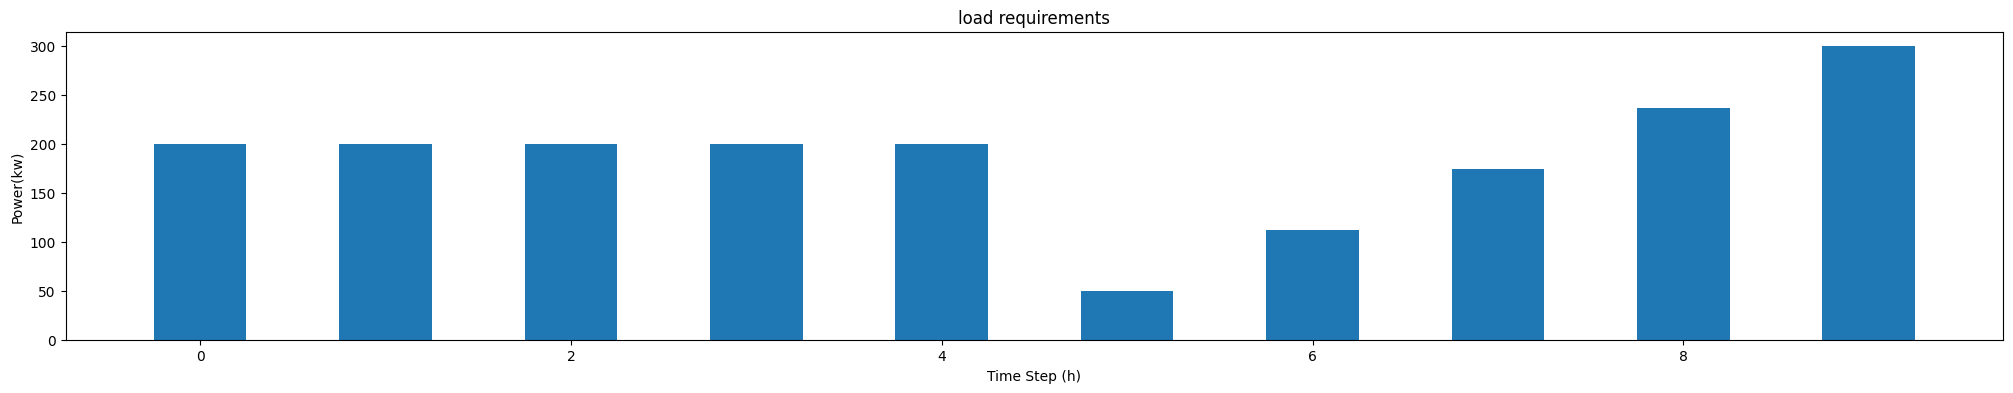

In [2002]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,d_load_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.title('load requirements')
plt.show()

In [2003]:
print(V_steps,L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] {0: 200.0, 1: 200.0, 2: 200.0, 3: 200.0, 4: 200.0, 5: 50.0, 6: 112.5, 7: 175.0, 8: 237.5, 9: 300.0, 20: 200.0, 21: 194.44444444444446, 22: 188.88888888888889, 23: 183.33333333333334, 24: 177.77777777777777, 25: 172.22222222222223, 26: 166.66666666666669, 27: 161.11111111111111, 28: 155.55555555555554, 29: 150.0, 30: 150.0, 31: 153.44827586206895, 32: 156.89655172413794, 33: 160.3448275862069, 34: 163.79310344827587, 35: 167.24137931034483, 36: 170.68965517241378, 37: 174.13793103448276, 38: 177.58620689655172, 39: 181.0344827586207, 40: 184.48275862068965, 41: 187.9310344827586, 42: 191.3793103448276, 43: 194.82758620689654, 44: 198.27586206896552, 45: 201.72413793103448, 46: 205.17241379310343, 47: 208.6206896551724, 48: 212.06896551724137, 49: 215.51724137931035, 50: 218.9655172413793, 51: 222.41379310344826, 52: 225.86206896551724, 53: 229.31034482758622, 54: 232.75862068965517, 55: 236.20689655172413, 56: 239.65517241379308, 57: 243.10344827586206, 58

$\newline $
### Generated genset power.

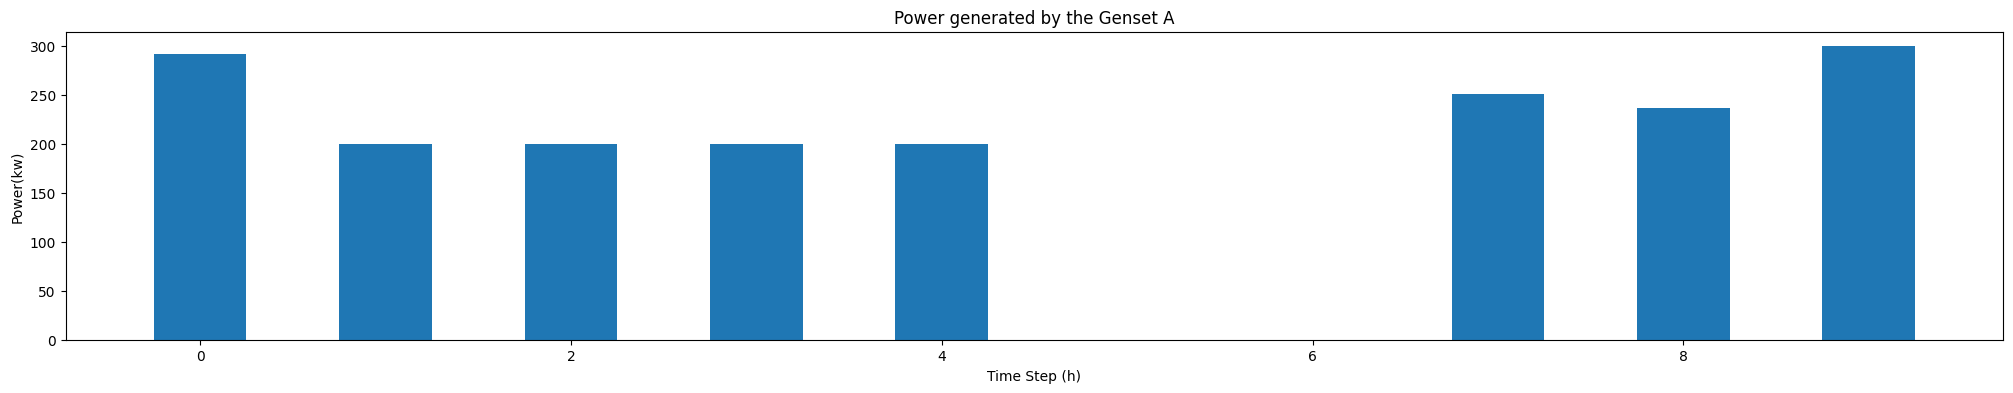

In [2004]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,P_A_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.title('Power generated by the Genset A')
plt.show()

In [2005]:
print(V_steps,P_A_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [292.6697209496038, 200.00000000000009, 200.00000000000014, 200.00000000000023, 200.0000000000001, 0.0, 0.0, 251.53061224489798, 237.5, 300.0]


$\newline $
### Realised power from the genset to load.

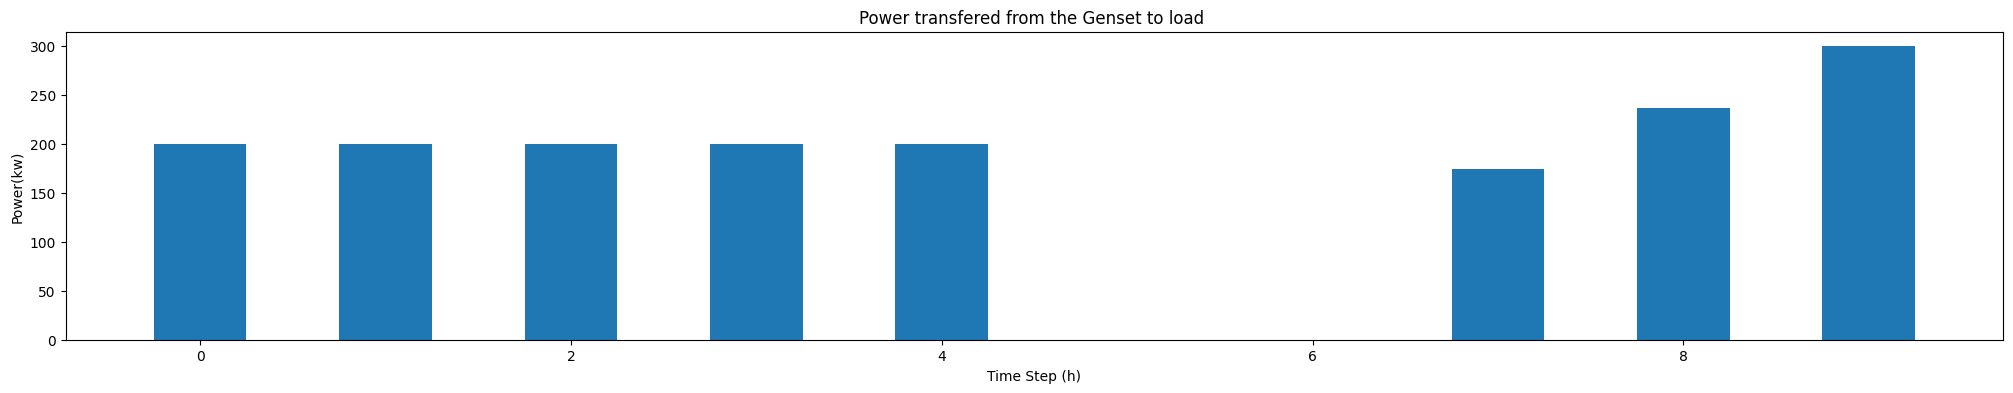

In [2006]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,P_A_load_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.title('Power transfered from the Genset to load ')
plt.show()

In [2007]:
print(V_steps,P_A_load_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [200.0, 200.0, 200.0, 200.0, 200.0, 0.0, 0.0, 175.0, 237.5, 300.0]


$\newline $
### Realised power to charge the battery.

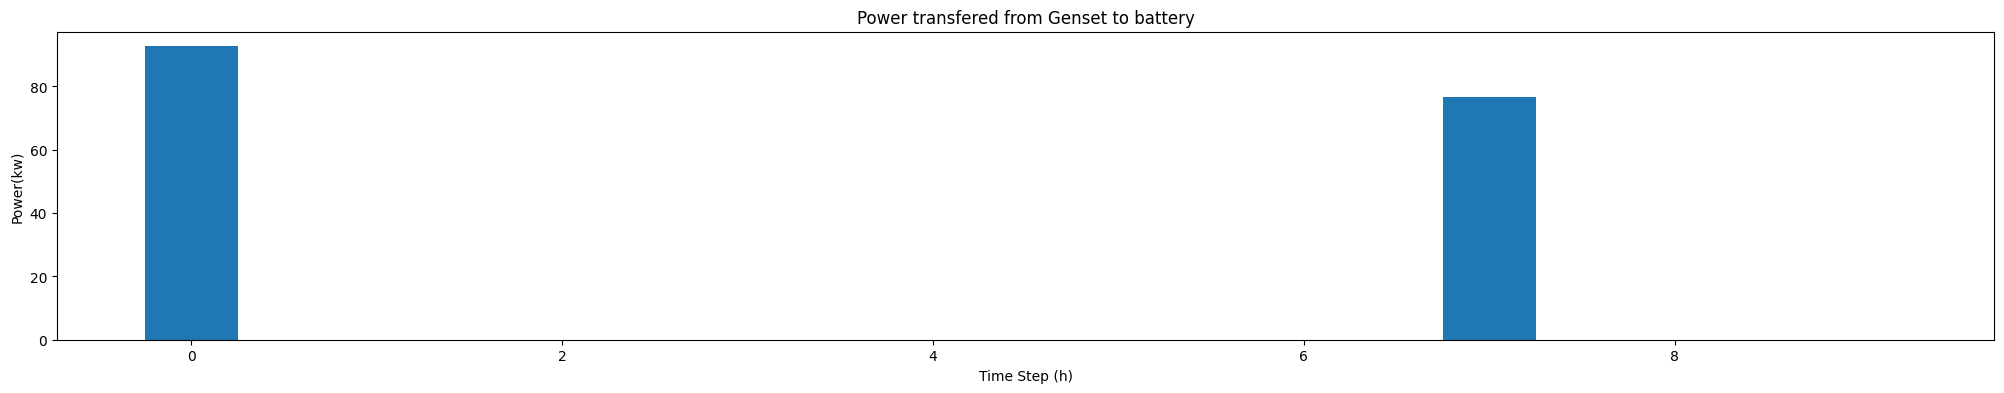

In [2008]:
plt.rcParams["figure.figsize"] =  (25,4)                
plt.bar(V_steps,P_A_to_bat_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.xticks()
plt.title('Power transfered from Genset to battery')
plt.show()

In [2009]:
print(V_steps,P_A_to_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [92.66972094960381, 8.526512829121202e-14, 1.4210854715202004e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 0.0, 0.0, 76.53061224489798, 0.0, 0.0]


$\newline $
### Realised power from the battery to load.

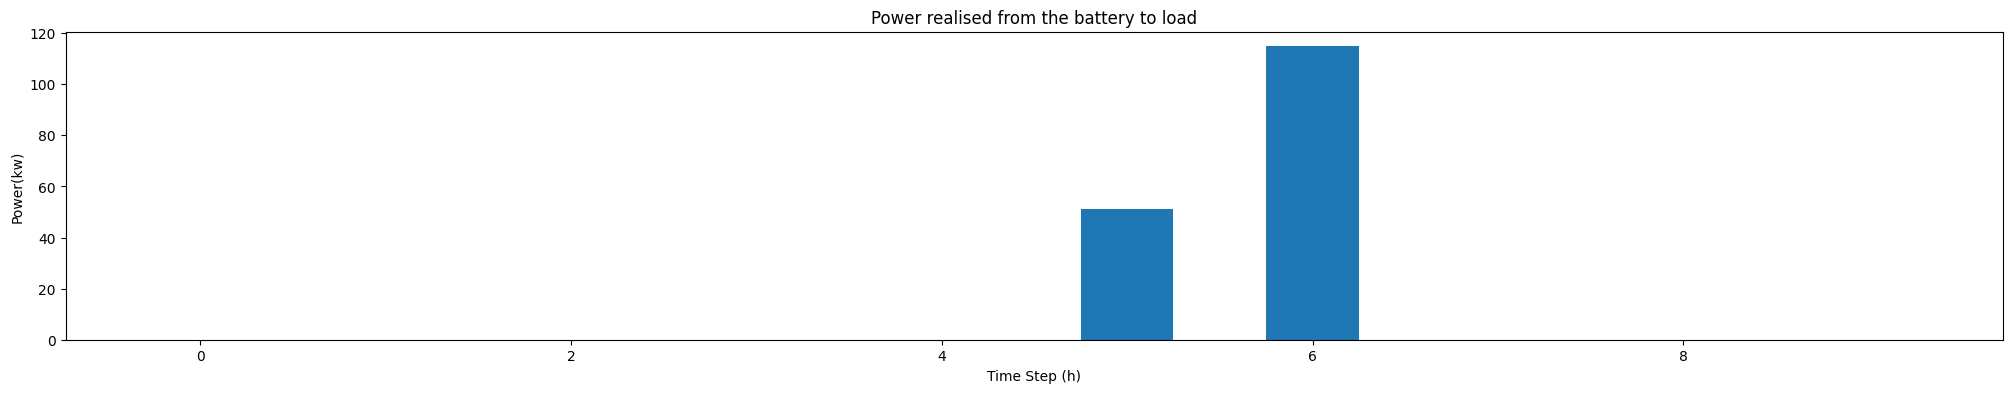

In [2010]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,P_From_bat_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.title('Power realised from the battery to load')
plt.show()

In [2011]:
print(V_steps,P_From_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0, 0.0, 0.0, 0.0, 0.0, 51.02040816326531, 114.79591836734694, 0.0, 0.0, 0.0]


### Battery charge balance.

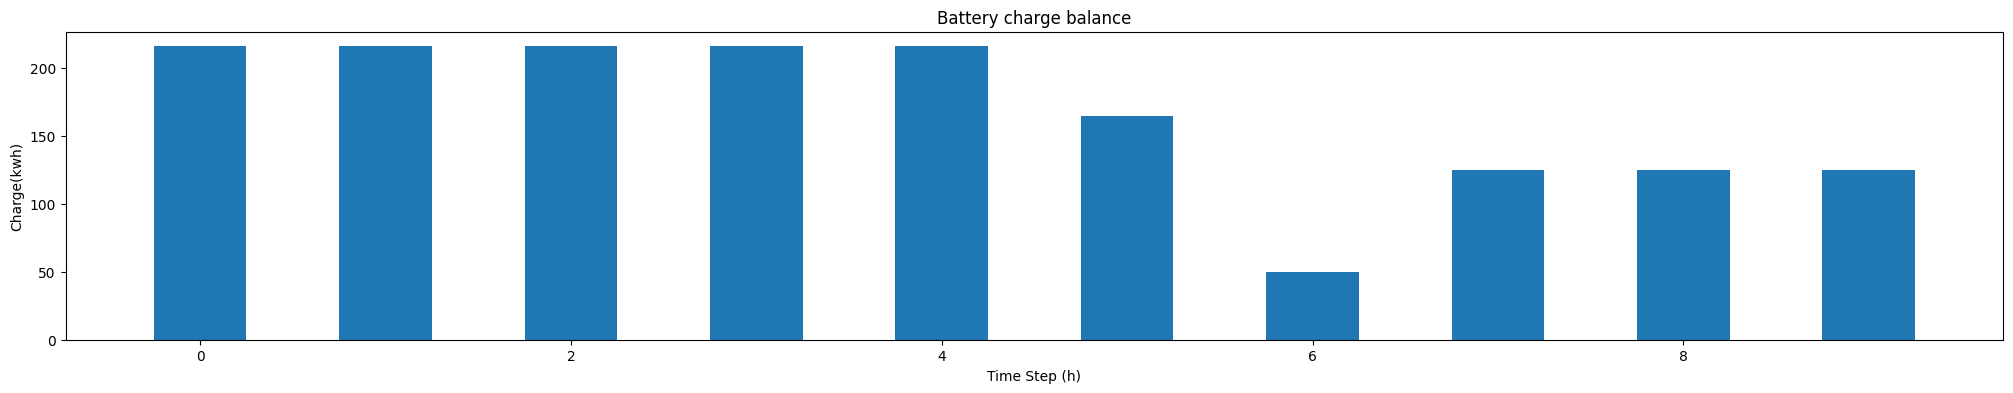

In [2012]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,Q_bat_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('Charge(kwh)')
plt.title('Battery charge balance')
plt.show()

In [2013]:
print(V_steps,Q_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [215.81632653061175, 215.81632653061183, 215.81632653061195, 215.81632653061217, 215.8163265306123, 164.79591836734699, 50.0, 125.0, 125.0, 125.0]


$\newline $
### Genset fuel consumption.

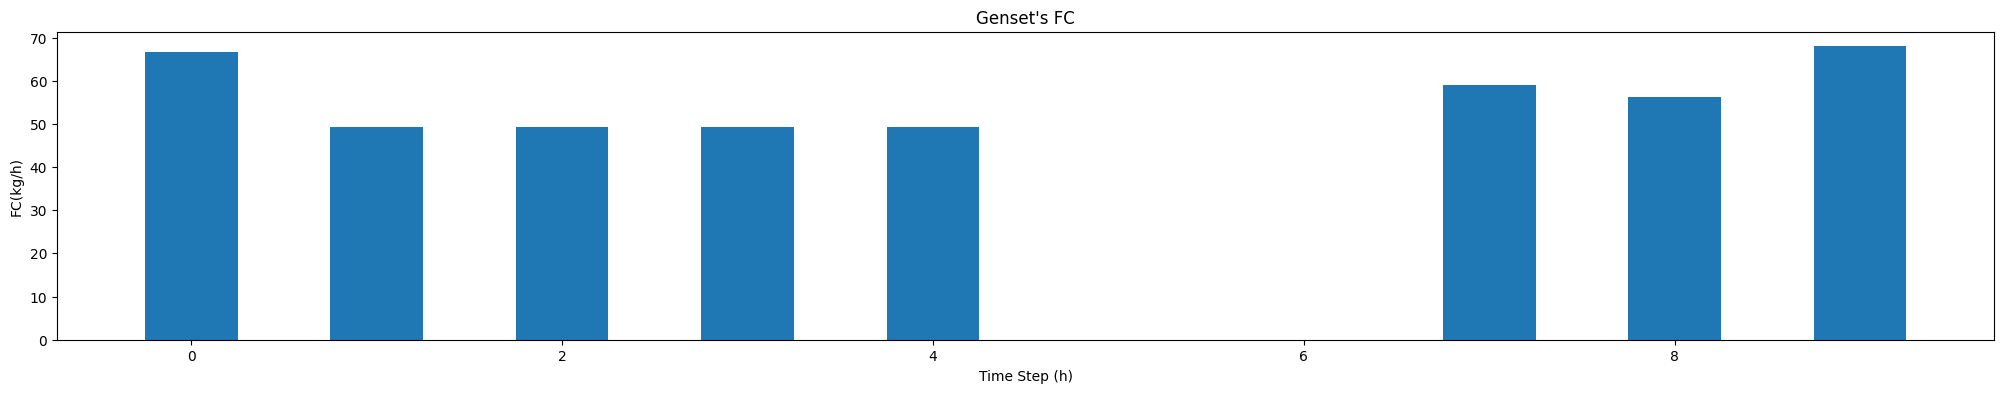

In [2014]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,FC_A_list, width=0.5)
plt.xlabel('Time Step (h)')
plt.ylabel('FC(kg/h)')
plt.title("Genset's FC")
plt.show()

In [2015]:
print(V_steps, FC_A_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [66.5843690129112, 49.32000000000001, 49.32000000000002, 49.320000000000036, 49.320000000000014, 0.0, 0.0, 58.92015306122449, 56.30624999999999, 67.95]


In [2016]:
print(sum(FC_A_list)*dt)

447.0407720741357


$\newline $
$\newline $
### Trip power flow bar chart.

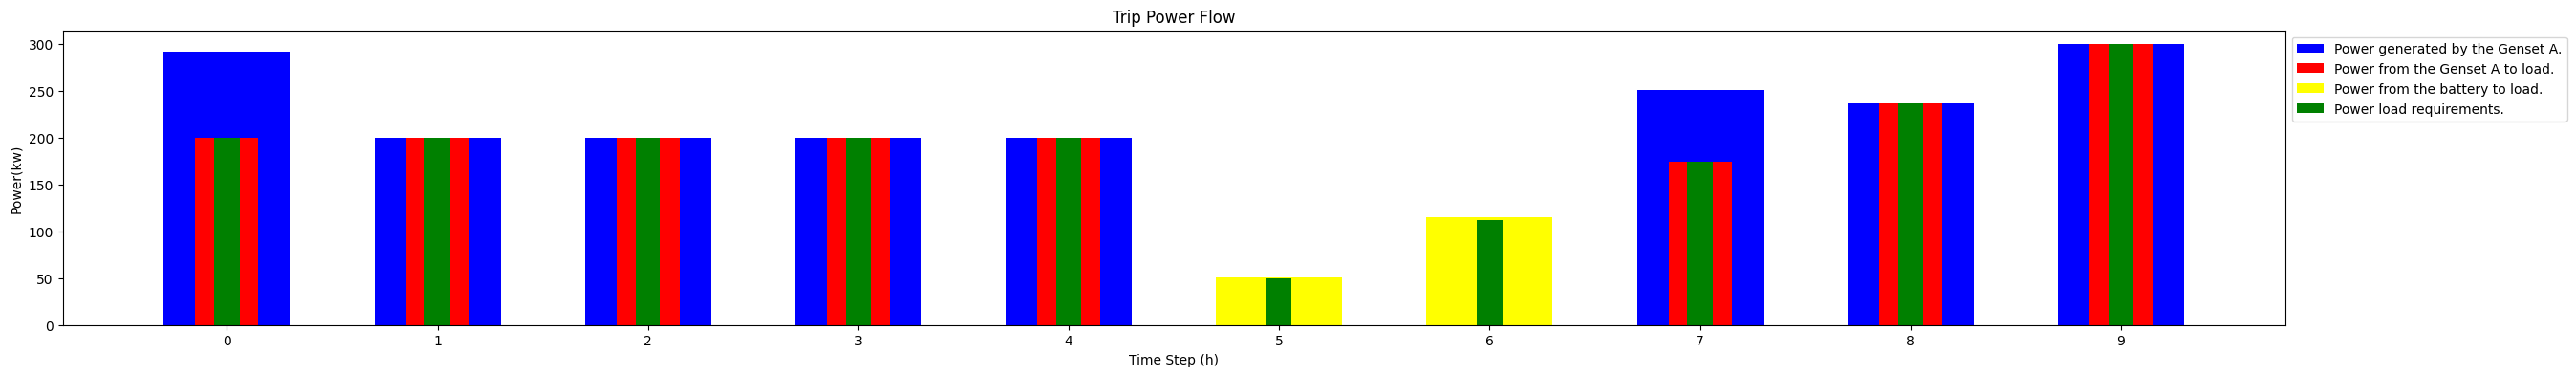

In [2017]:
 
plt.rcParams["figure.figsize"] = (30,4)

gridnumber = V_steps

b1 = plt.bar(gridnumber, P_A_list, color="blue", width=0.6,
                label="Power generated by the Genset A.", align="center")

b2 = plt.bar(gridnumber, P_A_load_list, color="red", width=0.3,
                label="Power from the Genset A to load.", align="center")

b3 = plt.bar(gridnumber, P_From_bat_list, color="yellow", width=0.6,
                label="Power from the battery to load.", align="center")

b4 = plt.bar(gridnumber,d_load_list , color="green", width=0.12,
                label="Power load requirements.", align="center")

plt.title('Trip Power Flow')
plt.xlabel('Time Step (h)')
plt.ylabel('Power(kw)')
plt.xticks(gridnumber)
plt.legend(bbox_to_anchor= (1, 1))
plt.show()

